In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from courtvision.geometry import corners_world_3d, corners_frontwall_world_n
from courtvision.geometry import get_corners_verital_plane_on_image


annotated_frame = Path(
    "/Users/benjamindecharmoy/projects/courtvision/data/frames/curated_001/curated_001_frame_0001.png"
)
src_corners_n = get_corners_verital_plane_on_image(annotated_frame, plane="front")

dst_corners_n = corners_frontwall_world_n.copy()

named_points_not_labelled_in_image = set(dst_corners_n.keys()) - set(
    src_corners_n.keys()
)
for key in named_points_not_labelled_in_image:
    print(f"Removing {key=}")
    dst_corners_n.pop(key)

In [2]:
src_corners_n, dst_corners_n

({'a_front_left': (0.1111111111111111, 0.8790123456790124),
  'b_front_right': (0.8944444444444444, 0.8864197530864197),
  'm_top_front_left': (0.08781544542793732, 0.48942058838612346),
  'n_top_front_right': (0.9141485490658893, 0.48850634147450556)},
 {'a_front_left': (0.0, 1.0),
  'b_front_right': (1.0, 1.0),
  'm_top_front_left': (0.0, 0.0),
  'n_top_front_right': (1.0, 0.0)})

In [18]:
from courtvision.geometry import compute_homography_to_vertical_plane

H, _, _ = compute_homography_to_vertical_plane(
    annotated_frame=annotated_frame,
    src_corners_n=src_corners_n,
    dst_corners_n=dst_corners_n,
)
H
# save_camera_params(
#     file_name=annotated_frame,
#     homography=H,
# )

array([[ 9.09142405e-01, -9.66439760e-02, -6.81353581e+01],
       [ 5.93720192e-04,  9.54040584e-01, -3.36254241e+02],
       [ 1.98251071e-05, -1.74933071e-04,  1.00000000e+00]])

[[999.9999890236704, 299.99999670710116]]
[(1144.8888888888887, 638.2222222222222)]


(<Figure size 1500x1500 with 2 Axes>,
 array([[<Axes: >, <Axes: >]], dtype=object))

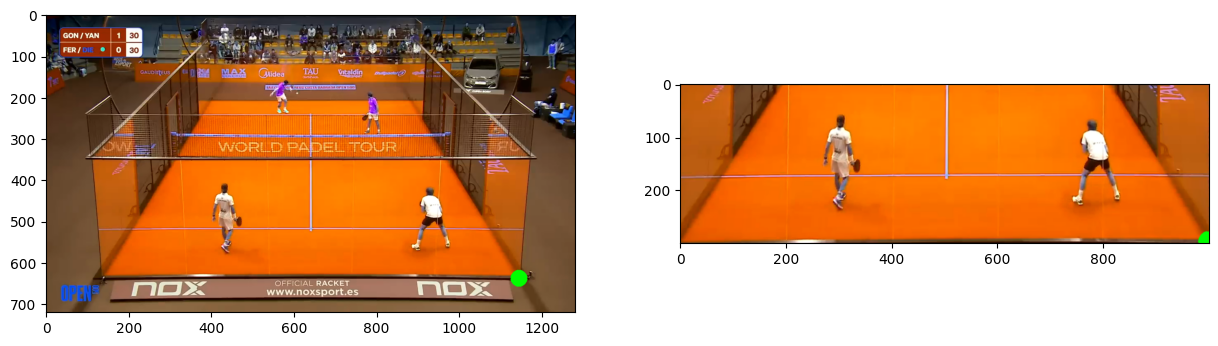

In [19]:
import numpy as np
import cv2
from courtvision.geometry import PadelCourt, project_points_to_base_plane

# from courtvision.data import Rectvalue
import torch
from courtvision.vis import load_timg, draw_rect, draw_points

image = cv2.imread(annotated_frame.as_posix(), cv2.IMREAD_COLOR)
h, w, _ = image.shape
points = [(o[0] * w, o[1] * h) for o in src_corners_n.values()][1:2]
dd = project_points_to_base_plane(points=torch.tensor(points), H=H)
print(dd.tolist())
print(points)
image = draw_points(image, points=points, color=(0, 255, 0), radius=10, thickness=20)
court_plane = cv2.warpPerspective(
    image,
    H,
    dsize=(int(PadelCourt.width), int(PadelCourt.backwall_height)),
)

from courtvision.vis import plot_n_images_in_a_grid

plot_n_images_in_a_grid([image, court_plane], n_cols=2)

In [18]:
H

array([[ 9.09142405e-01, -9.66439760e-02, -6.81353581e+01],
       [ 3.95813461e-03,  6.36027056e+00, -2.24169494e+03],
       [ 1.98251071e-05, -1.74933071e-04,  1.00000000e+00]])